In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/cod/Desktop/train.csv')
df_test = pd.read_csv('C:/Users/cod/Desktop/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.drop(['PassengerId','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [6]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [7]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [8]:
df_train.Survived.isnull().any()

False

In [9]:
df_train.Pclass.isnull().any()

False

In [10]:
df_train.Name.isnull().any()

False

In [11]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
for col in df_train.columns:
    msg='column : {:<10} Nan : {:.2f}%'.format(col,
                        100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : Survived   Nan : 0.00%
column : Pclass     Nan : 0.00%
column : Name       Nan : 0.00%
column : Sex        Nan : 0.00%
column : Age        Nan : 19.87%
column : SibSp      Nan : 0.00%
column : Parch      Nan : 0.00%
column : Fare       Nan : 0.00%
column : Cabin      Nan : 77.10%
column : Embarked   Nan : 0.22%


In [14]:
for col in df_test.columns:
    msg='column : {:<10} Nan : {:.2f}%'.format(col,
                                100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : Pclass     Nan : 0.00%
column : Name       Nan : 0.00%
column : Sex        Nan : 0.00%
column : Age        Nan : 20.57%
column : SibSp      Nan : 0.00%
column : Parch      Nan : 0.00%
column : Fare       Nan : 0.24%
column : Cabin      Nan : 78.23%
column : Embarked   Nan : 0.00%


In [15]:
for col in df_test.columns:
    print('{},{}'.format(col,df_test[col].shape[0]))

df_test['Pclass'].shape[0]
df_test.Pclass.shape[0]

Pclass,418
Name,418
Sex,418
Age,418
SibSp,418
Parch,418
Fare,418
Cabin,418
Embarked,418


418

In [16]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [17]:
df_train.loc[df_train['Age'].isnull()]=df_train['Age'].mean()

<AxesSubplot:>

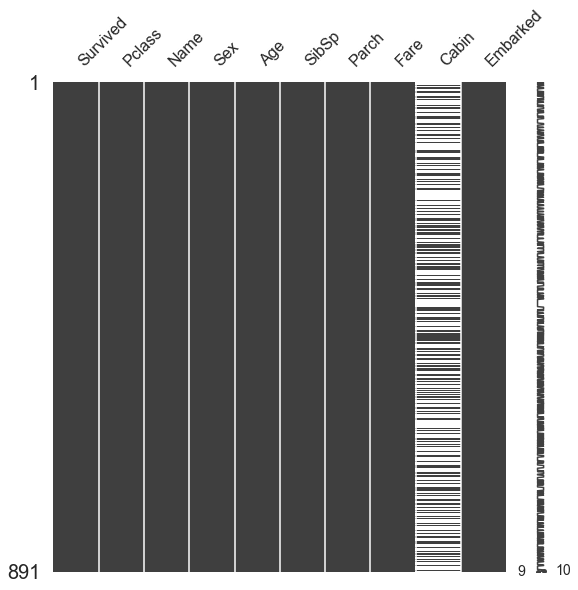

In [18]:
msno.matrix(df=df_train.iloc[:,:],figsize=(9,9))

In [19]:
df_test.loc[df_test['Age'].isnull(),'Age']=df_test.Age.mean()

<AxesSubplot:>

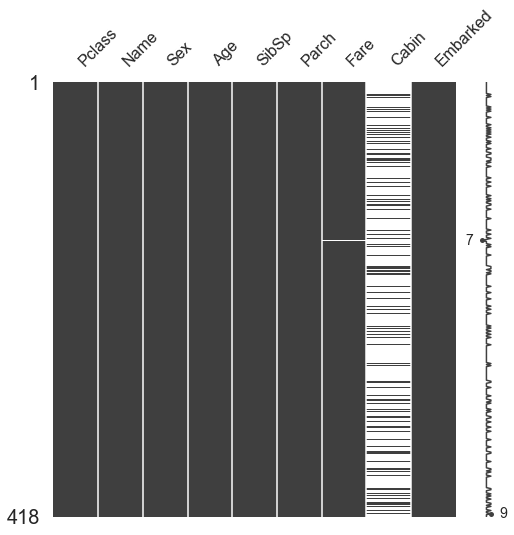

In [20]:
msno.matrix(df_test,figsize=(8,8))

In [21]:
df_test.loc[df_test.Fare.isnull()]=df_test.Fare.mean()

<AxesSubplot:>

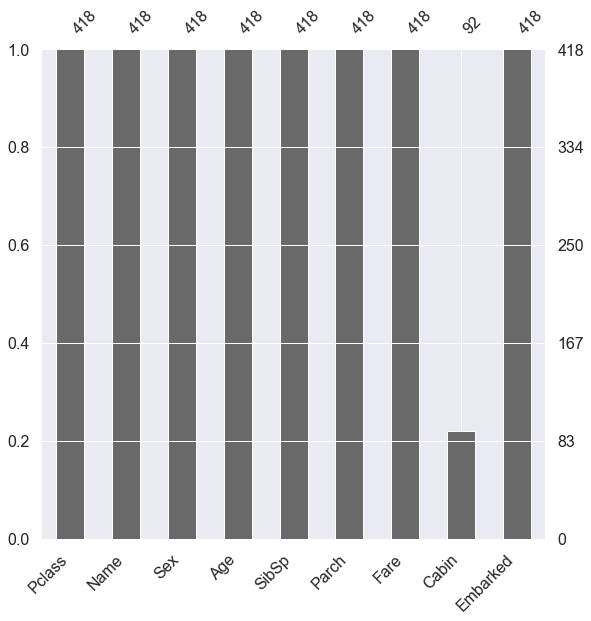

In [22]:
msno.bar(df_test,figsize=(9,9))

<AxesSubplot:>

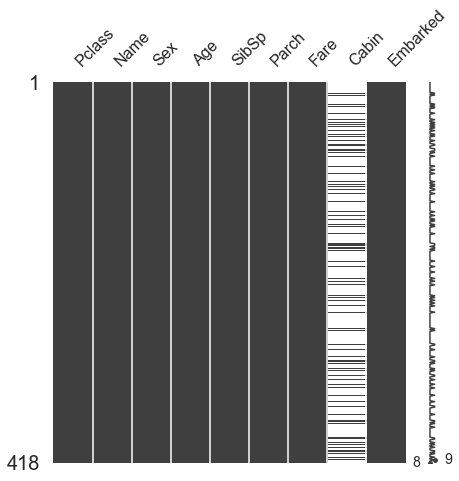

In [23]:
msno.matrix(df_test,figsize=(7,7))

In [24]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

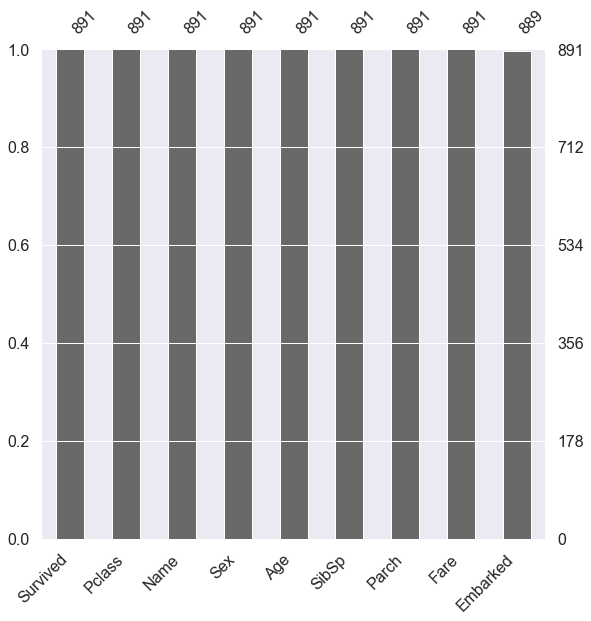

In [25]:
msno.bar(df_train,figsize=(9,9))

<AxesSubplot:>

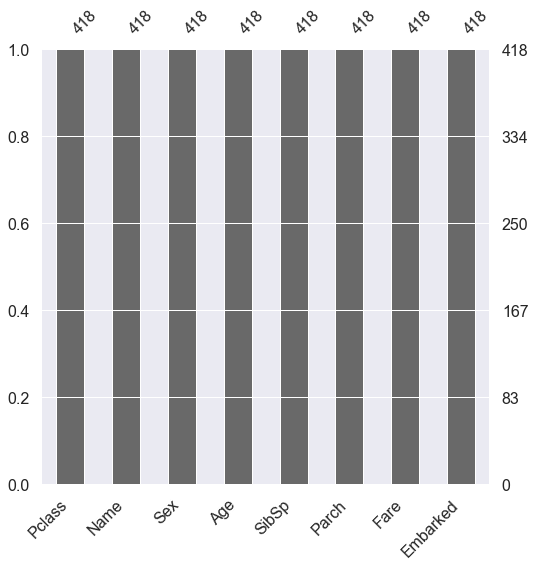

In [26]:
msno.bar(df_test,figsize=(8,8))

In [27]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,8.0500,S


In [28]:
df_train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 29.69911764705882,
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Fynney, Mr. Joseph J', 'Beesley, Mr. Lawrence',
       'McGowan, Miss. Anna "Annie"', 'Sloper, Mr. William Thompson',
       'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
       'Fortune, Mr. Charles Ale

In [29]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')

In [30]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', nan, 'Master', 'Don', 'Rev', 'Dr', 'Mme',
       'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [31]:
df_test['Initial']=df_test.Name.str.extract('([A-Za-z])\.')

In [32]:
df_test.Initial.head()

0    r
1    s
2    r
3    r
4    s
Name: Initial, dtype: object

In [33]:
x=pd.DataFrame({'cat':['cat','caat']})

In [34]:
df_test.Initial.unique()

array(['r', 's', 'l', 'v', nan, 'a'], dtype=object)

In [35]:
df_test.Initial.describe()

count     417
unique      5
top         r
freq      261
Name: Initial, dtype: object

In [36]:
pd.crosstab(df_train['Initial'],df_train['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,5
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,36


In [37]:
df_train.Initial[df_train['Sex']=='male']

0          Mr
4          Mr
6          Mr
7      Master
12         Mr
        ...  
883        Mr
884        Mr
886       Rev
889        Mr
890        Mr
Name: Initial, Length: 453, dtype: object

In [38]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [39]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0.000000,3.000000,male,22.000000,1.000000,0.000000,7.250000,S,Mr
1,1.000000,1.000000,female,38.000000,1.000000,0.000000,71.283300,C,Mrs
2,1.000000,3.000000,female,26.000000,0.000000,0.000000,7.925000,S,Miss
3,1.000000,1.000000,female,35.000000,1.000000,0.000000,53.100000,S,Mrs
4,0.000000,3.000000,male,35.000000,0.000000,0.000000,8.050000,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0.000000,2.000000,male,27.000000,0.000000,0.000000,13.000000,S,Rev
887,1.000000,1.000000,female,19.000000,0.000000,0.000000,30.000000,S,Miss
888,29.699118,29.699118,29.699118,29.699118,29.699118,29.699118,29.699118,29.699118,NaN
889,1.000000,1.000000,male,26.000000,0.000000,0.000000,30.000000,C,Mr


<AxesSubplot:>

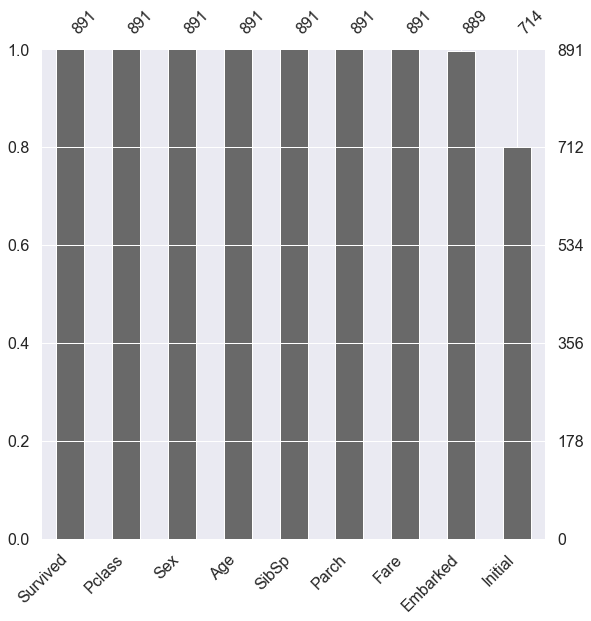

In [40]:
msno.bar(df_train,figsize=(9,9))

In [41]:
100*(df_train.Initial.isnull().sum()/df_train.Initial.shape[0])

19.865319865319865

In [42]:
df_train.Initial.describe()

count     714
unique     17
top        Mr
freq      398
Name: Initial, dtype: object

In [43]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,6.225302,7.692193,29.699118,6.310599,6.245504,33.702163
std,11.702324,10.988929,13.002015,11.681243,11.708924,47.407319
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,9.500000
50%,1.000000,3.000000,29.699118,0.000000,0.000000,26.000000
75%,1.000000,3.000000,35.000000,2.000000,2.000000,29.699118
max,29.699118,29.699118,80.000000,29.699118,29.699118,512.329200


In [44]:
df_train.drop('Initial',axis=1,inplace=True)
df_test.drop('Initial',axis=1,inplace=True)

In [45]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S


In [46]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,34.5,0.0,0.0,7.8292,Q
1,3.0,female,47.0,1.0,0.0,7.0000,S
2,2.0,male,62.0,0.0,0.0,9.6875,Q
3,3.0,male,27.0,0.0,0.0,8.6625,S
4,3.0,female,22.0,1.0,1.0,12.2875,S


<AxesSubplot:xlabel='Pclass'>

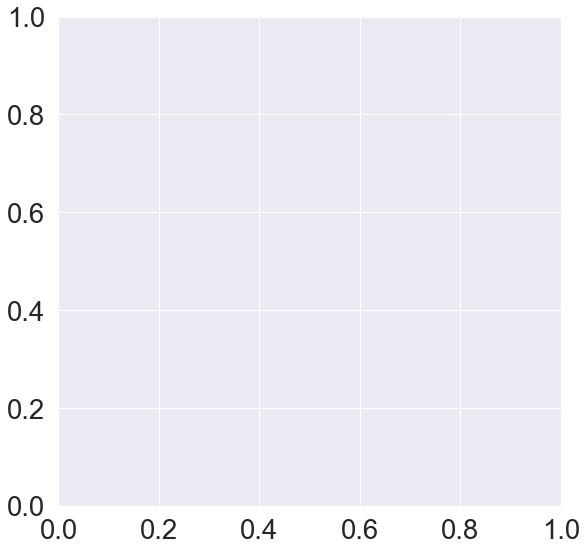

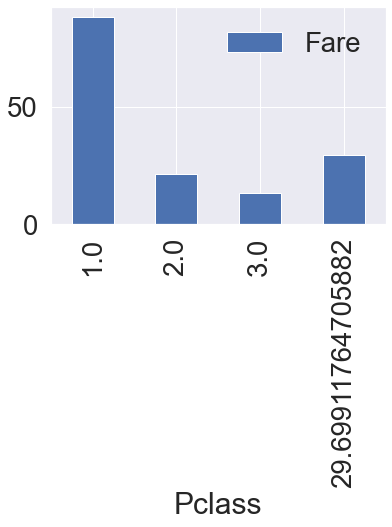

In [47]:
f,ax = plt.subplots(1,1,figsize=(9,9))

df_train[['Pclass','Fare']].groupby(['Pclass']).mean().plot.bar()

In [48]:
pd.crosstab(df_train['Pclass'],df_train['Fare'],margins=True)

Fare,0.0,4.0125,5.0,6.2375,6.4375,6.45,6.4958,6.75,6.975,7.0458,...,153.4625,164.8667,211.3375,211.5,227.525,247.5208,262.375,263.0,512.3292,All
Pclass,,,,,,,,,,,,,,,,,,,,,
1.0,3,0,1,0,0,0,0,0,0,0,...,3,2,3,1,3,2,2,4,3,186
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,173
3.0,4,1,0,1,1,1,2,2,2,1,...,0,0,0,0,0,0,0,0,0,355
29.69911764705882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,177
All,7,1,1,1,1,1,2,2,2,1,...,3,2,3,1,3,2,2,4,3,891


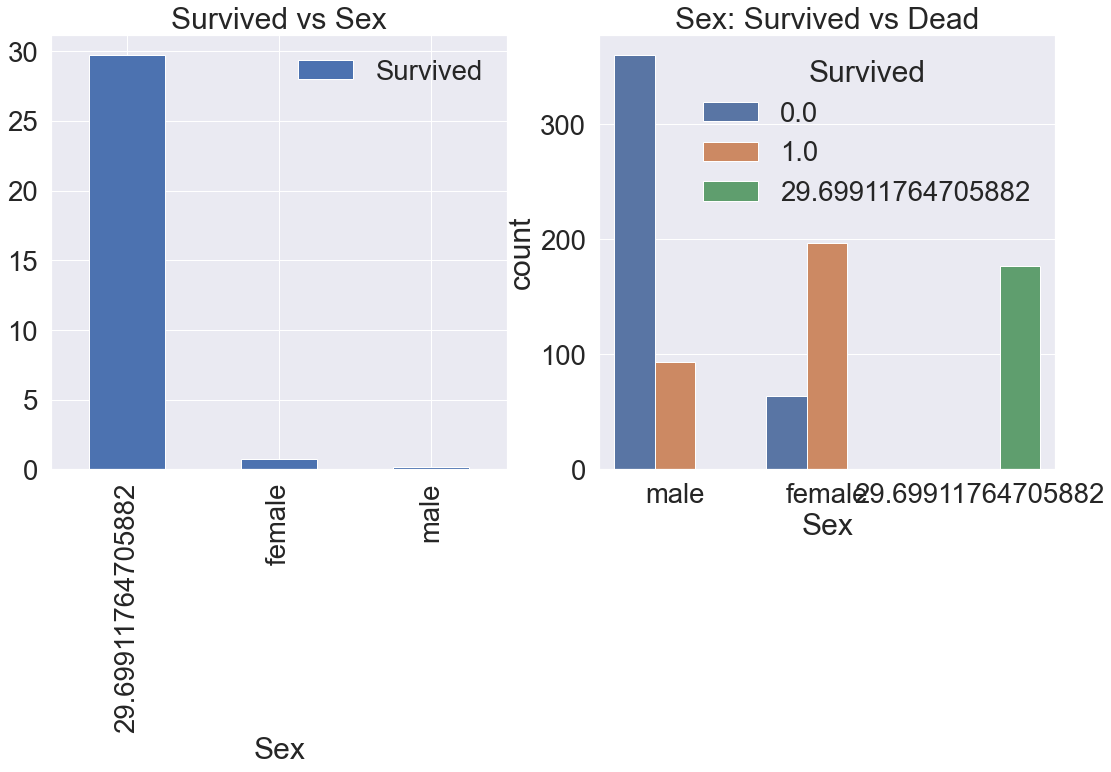

In [50]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

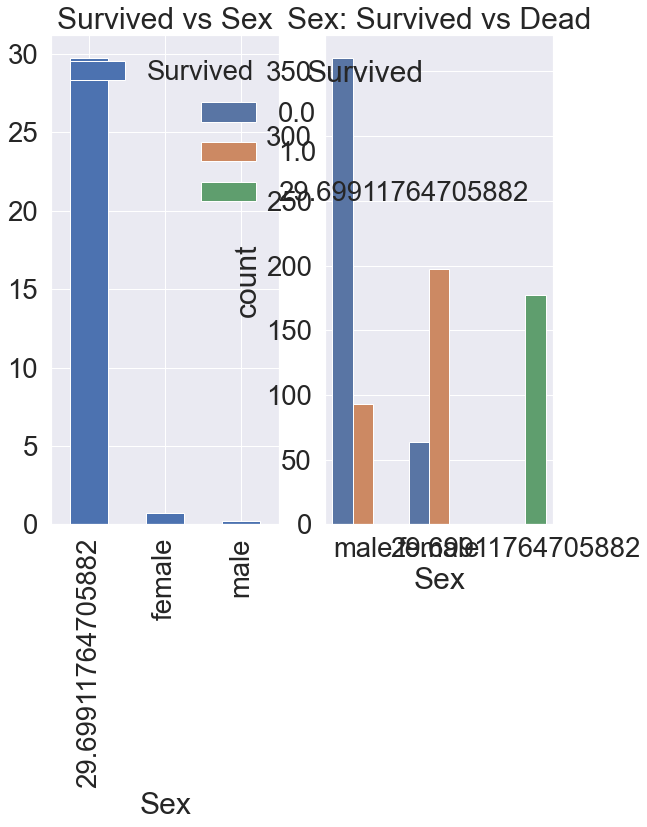

In [51]:
f,ax=plt.subplots(1,2,figsize=(9,9))

df_train[['Sex','Survived']].groupby(['Sex'],
                            as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()